In [1]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 12.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039187 sha256=cae32640fbda4d6e736357a6cb7b18080a8f4bb6429dcc2a9a7533efa33b9d33
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan


In [2]:
import pandas as pd
import numpy as np
import itertools
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.spatial import ConvexHull

In [3]:
path = "/content/drive/MyDrive/NSSTC/Fires/Fires Dataset/2021_03_forestfires.csv"

data = pd.read_csv(path)


In [4]:
scaler = MinMaxScaler()
scaler.fit(data)
dfs1 = scaler.transform(data)
dfs1 = pd.DataFrame(dfs1)

In [5]:
print(dfs1.shape)
print('------------------------------------------------')
print(dfs1.isnull().sum())
print('------------------------------------------------')
print(dfs1.describe())

(132452, 3)
------------------------------------------------
0    0
1    0
2    0
dtype: int64
------------------------------------------------
                   0              1              2
count  132452.000000  132452.000000  132452.000000
mean        0.623733       0.462207       0.013198
std         0.121258       0.210510       0.034407
min         0.000000       0.000000       0.000000
25%         0.548366       0.265947       0.001917
50%         0.631913       0.481968       0.004820
75%         0.709757       0.636035       0.010362
max         1.000000       1.000000       1.000000


In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)
labels = clusterer.fit(dfs1)

<Axes: >

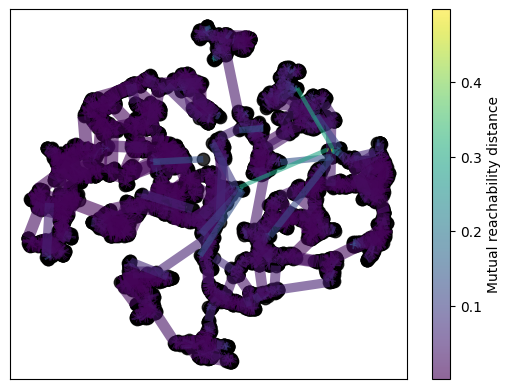

In [ ]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

In [ ]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

RecursionError: ignored

In [ ]:
clusterer.condensed_tree_.plot()

In [ ]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

array([-1,  0,  1,  2,  3,  4,  5,  6])

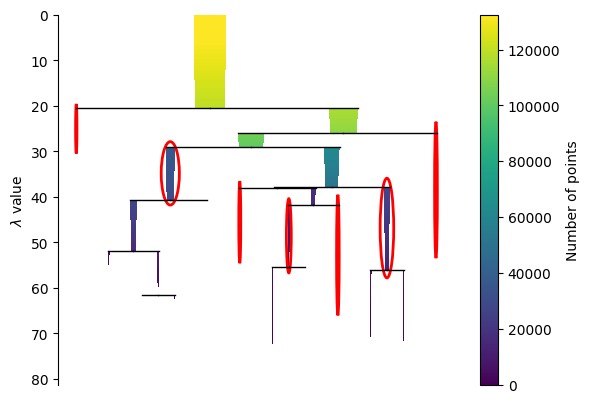

In [67]:
import hdbscan
hdbscan = hdbscan.HDBSCAN(min_cluster_size=1000)
labels = hdbscan.fit_predict(dfs1)
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(labels)

In [68]:
clusterad= pd.DataFrame(labels, columns = ['cluster'])
clusterad

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
132447,-1
132448,-1
132449,-1
132450,-1


In [69]:
clusterad.cluster.unique()

array([-1,  1,  4,  0,  2,  3,  5,  6])

In [70]:
data ['cluster'] = clusterad
data.head()

,LATITUDE,LONGITUDE,FRP,cluster
0,11.377116,98.862061,1.99,-1
1,10.456819,98.548668,0.99,-1
2,11.303014,98.885735,0.45,-1
3,10.455803,98.550659,0.73,-1
4,10.820849,98.764656,0.43,-1


In [71]:
MarFFscore=silhouette_score(dfs1, data.cluster)
print("MarFF:",MarFFscore)

MarFF: 0.11475756006278583


In [74]:
data.to_csv(r'/content/drive/MyDrive/NSSTC/Fires/DBSCAN Final\HDBMarFF.csv', index=False)

In [75]:
data.head()

,LATITUDE,LONGITUDE,FRP,cluster
0,11.377116,98.862061,1.99,-1
1,10.456819,98.548668,0.99,-1
2,11.303014,98.885735,0.45,-1
3,10.455803,98.550659,0.73,-1
4,10.820849,98.764656,0.43,-1


In [ ]:
outliers_df = data[data.cluster == -1]
clusters_df = data[data.cluster != -1]

colors = data.cluster
col_clus = colors[colors != -1]
col_outliers = 'black'

clusters = Counter(data.cluster)
print(clusters)
print(data[data.cluster==-1].head(10))
print ('Number of Clusters = {}'.format(len(clusters)-1))

Counter({2: 2743, 0: 2240, -1: 1223, 3: 306, 1: 172})
     LATITUDE  LONGITUDE    FRP  cluster
0   11.852809  99.264160  14.11       -1
1   11.853423  99.269432  14.52       -1
2   12.572448  98.647720   1.61       -1
3   13.209913  98.578979   5.13       -1
4   14.773783  98.145233  15.67       -1
5   14.785495  98.143585   2.64       -1
6   12.111967  99.135803   4.03       -1
68  16.052429  94.224396   5.06       -1
69  16.052786  94.227463   5.06       -1
70  16.047327  94.224976   5.06       -1
Number of Clusters = 4


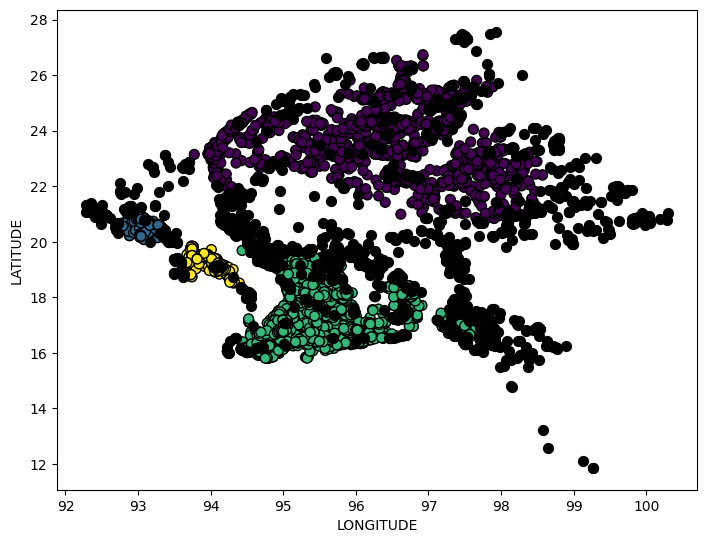

In [ ]:
fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 1,1])

ax.scatter(clusters_df['LONGITUDE'], clusters_df['LATITUDE'], c=col_clus, edgecolors = 'black', s=50)
ax.scatter(outliers_df['LONGITUDE'], outliers_df['LATITUDE'], c=col_outliers, edgecolors = 'black', s=50)


ax.set_xlabel('LONGITUDE')
ax.set_ylabel('LATITUDE')

#plt.grid(which='major')

plt.show()

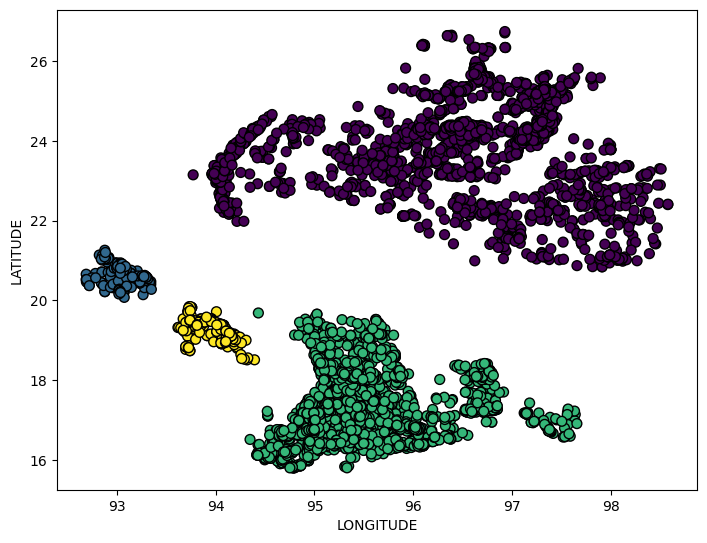

In [ ]:
fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 1,1])

ax.scatter(clusters_df['LONGITUDE'], clusters_df['LATITUDE'], c=col_clus, edgecolors = 'black', s=50)

for i in data.cluster.unique():
    points = data[data.cluster == i][['LATITUDE', 'LONGITUDE']].values
    hull = ConvexHull(points)



ax.set_xlabel('LONGITUDE')
ax.set_ylabel('LATITUDE')

#plt.grid(which='major')

plt.show()

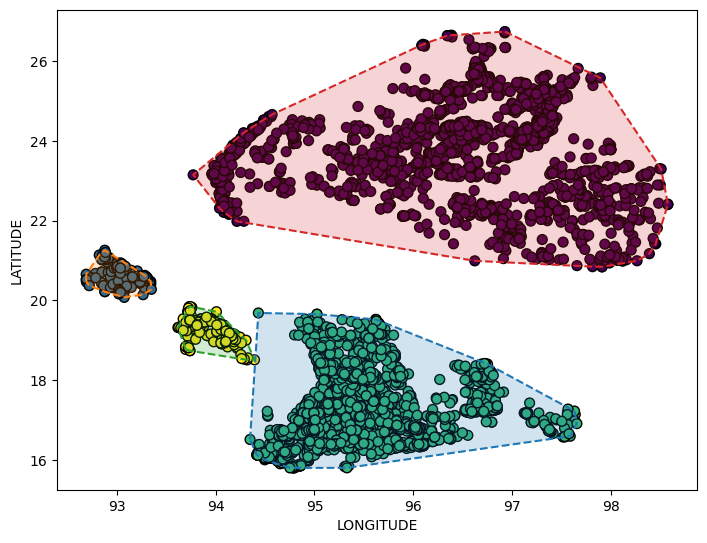

In [ ]:
fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 1,1])

ax.scatter(clusters_df['LONGITUDE'], clusters_df['LATITUDE'], c=col_clus, edgecolors = 'black', s=50)

# ax.scatter(outliers_df['LONGITUDE'], outliers_df['LATITUDE'], c=col_outliers, edgecolors = 'black', s=50)

a =data.cluster.unique()
s=np.delete(data.cluster.unique(), np.where(a == -1))

for i in s:
    points = data[data.cluster == i][['LATITUDE', 'LONGITUDE']].values

    hull = ConvexHull(points)

    vert = np.append(hull.vertices,hull.vertices[0])  # close the polygon by appending the first point at the end

    ax.plot(points[vert, 1], points[vert,0 ], '--')
    ax.fill(points[vert, 1], points[vert, 0], alpha=0.2)

ax.set_xlabel('LONGITUDE')
ax.set_ylabel('LATITUDE')

#plt.grid(which='major')

plt.show()

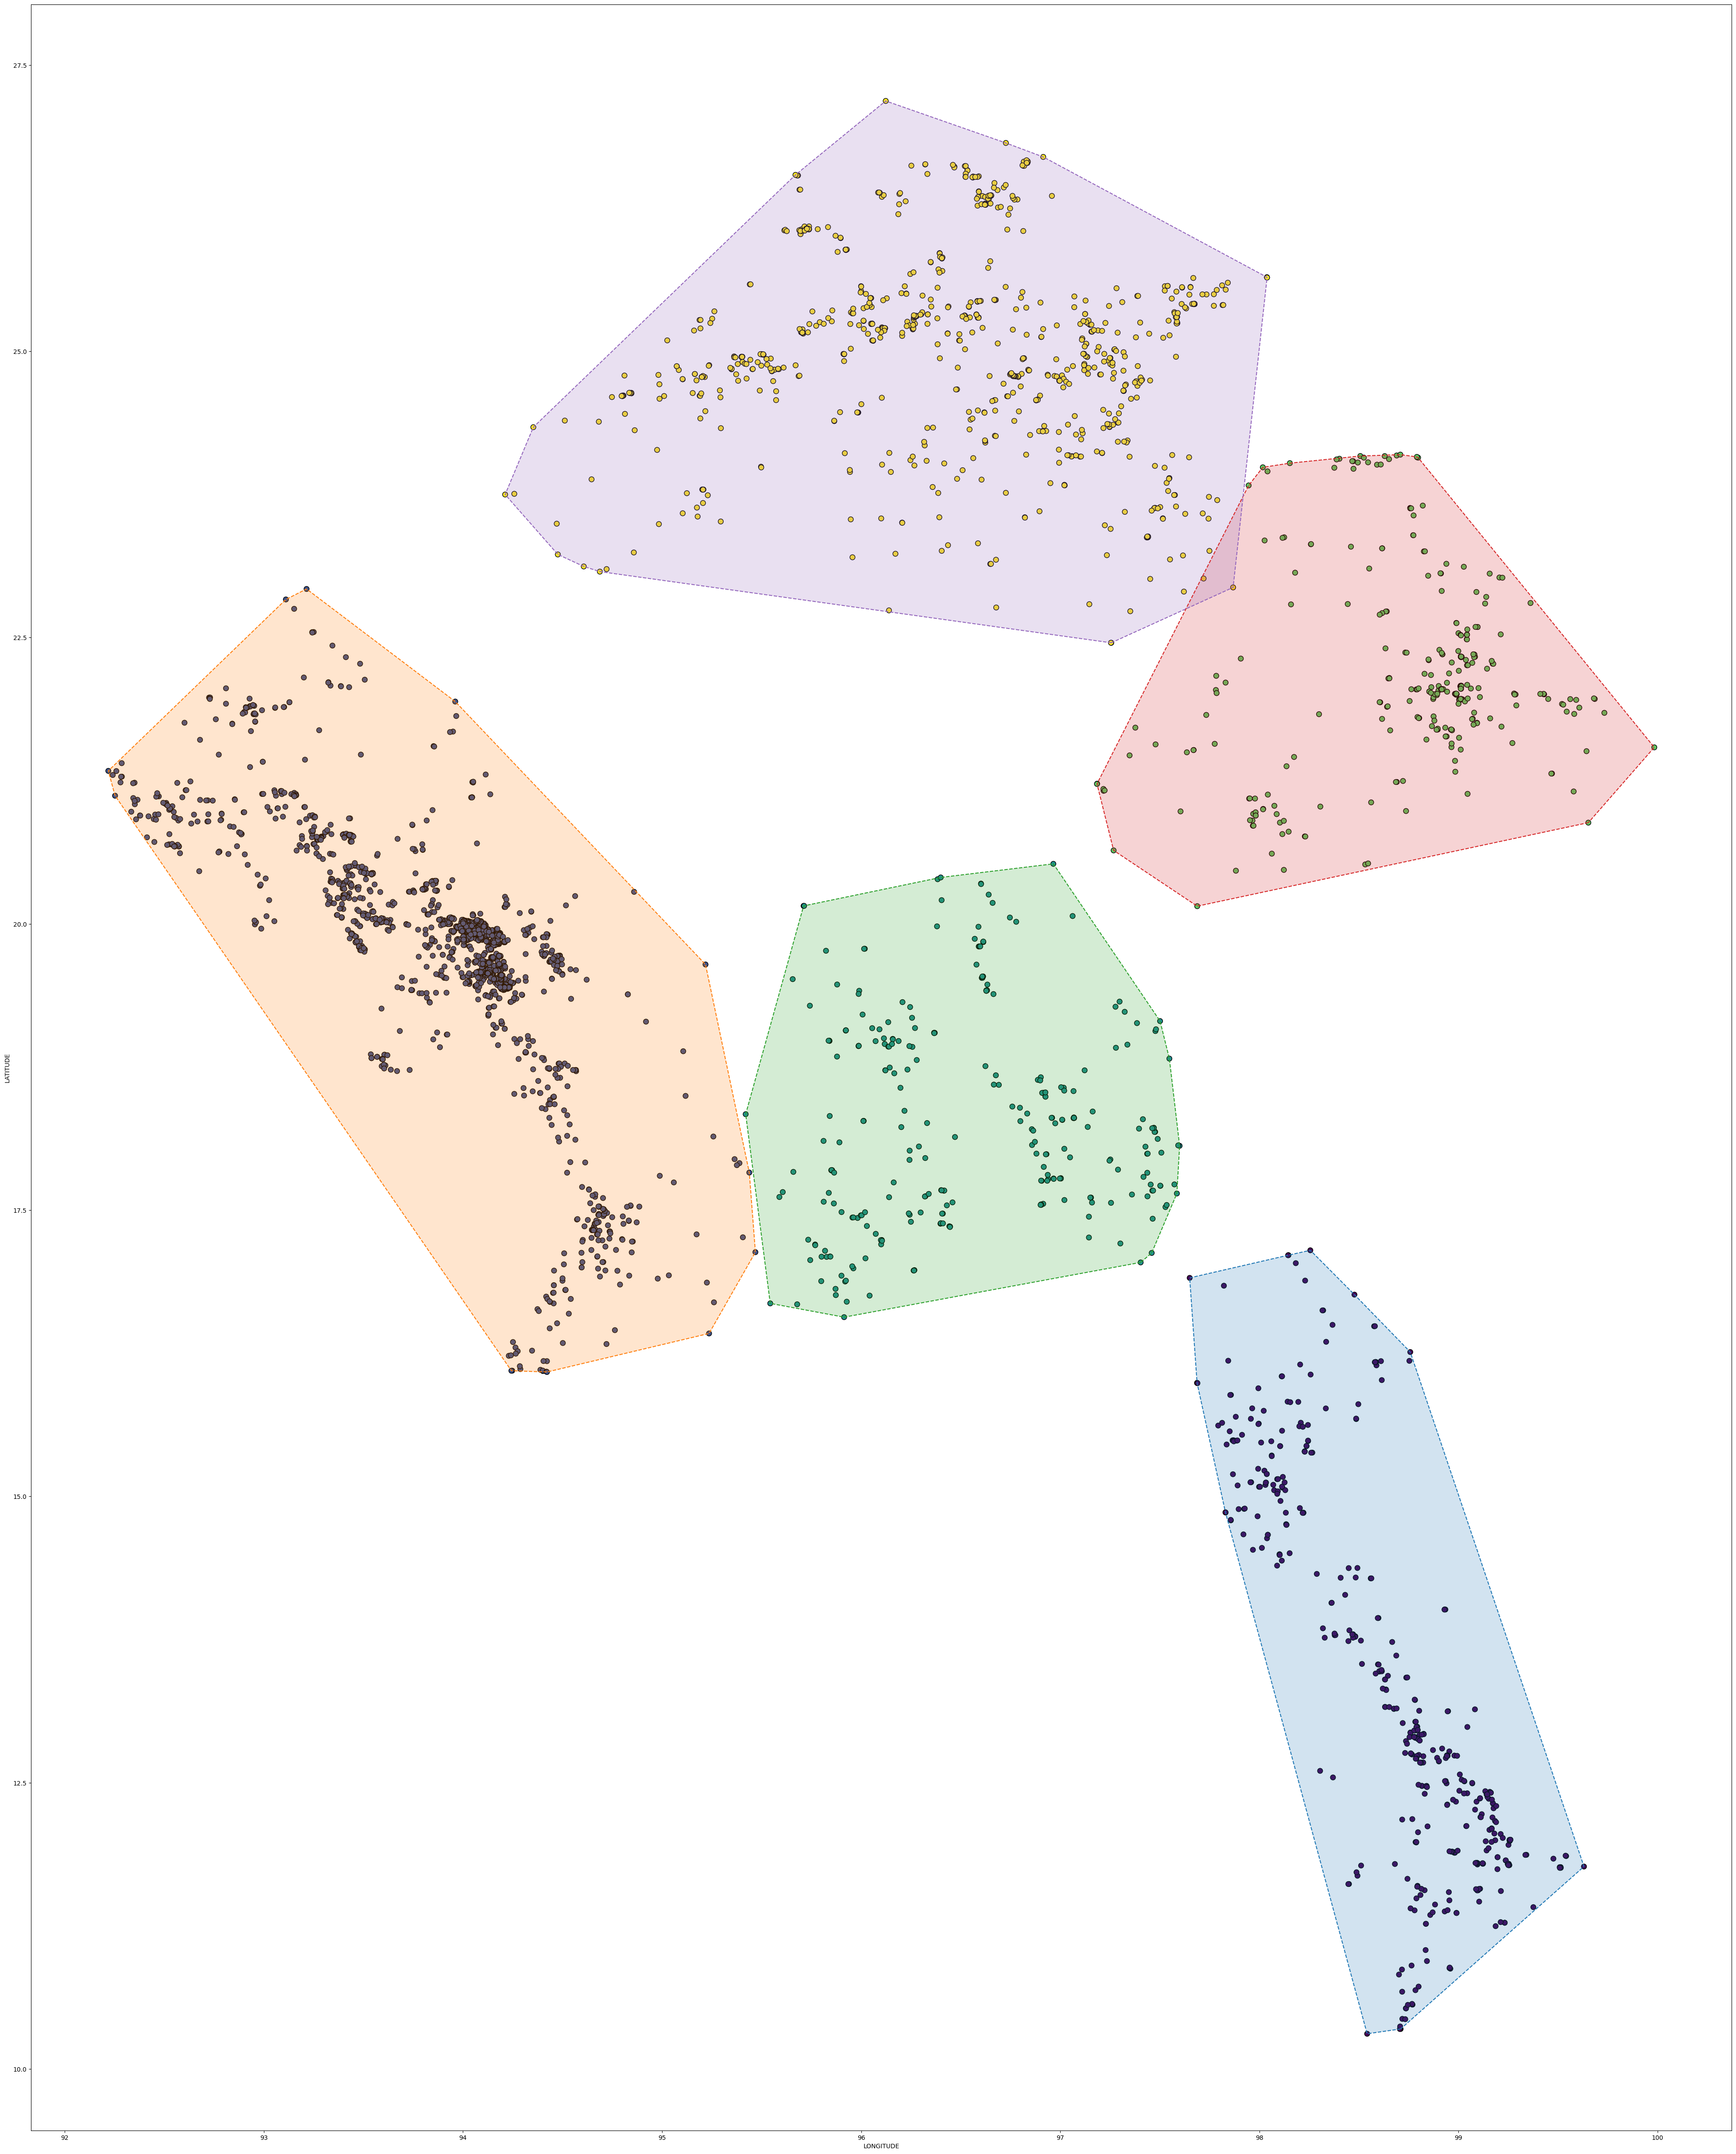

In [ ]:
fig = plt.figure()

ax = fig.add_axes([4, 4, 6, 10])

ax.scatter(clusters_df['LONGITUDE'], clusters_df['LATITUDE'], c=col_clus, edgecolors = 'black', s=70)
#ax.scatter(outliers_df['LONGITUDE'], outliers_df['LATITUDE'], c=col_outliers, edgecolors = 'black', s=50)

a =data.DBSCAN_Clusters.unique()
s=np.delete(data.DBSCAN_Clusters.unique(), np.where(a == -1))

for i in s:
    points = data[data.DBSCAN_Clusters == i][['LATITUDE', 'LONGITUDE']].values
    points = data[data.DBSCAN_Clusters == i][['LATITUDE', 'LONGITUDE']].values
    # get convex hull
    hull = ConvexHull(points)


    vert = np.append(hull.vertices, hull.vertices[0])  # close the polygon by appending the first point at the end
    ax.plot(points[vert, 1], points[vert, 0], '--')
    ax.fill(points[vert, 1], points[vert, 0], alpha=0.2)


ax.set_xlabel('LONGITUDE')
ax.set_ylabel('LATITUDE')

#plt.grid(which='major')

plt.show()